In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('/Users/srimedha/ML/MLPROJECT/data.csv')
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


In [37]:
data['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [38]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)
data.head()

,Measure,Country,Citizenship,Year,Value
0,0,Oceania,New Zealand Citizen,1979,11817.0
1,0,Oceania,Australian Citizen,1979,4436.0
2,0,Oceania,Total All Citizenships,1979,19965.0
3,0,Antarctica,New Zealand Citizen,1979,10.0
4,0,Antarctica,Australian Citizen,1979,0.0


In [115]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]
data.head(30)

,Measure,Country,Citizenship,Year,Value,CountryID,CitID
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0,0,0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0,0,1
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0,0,2
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0,1,0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0,1,1
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0,1,2
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0,2,0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0,2,1
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0,2,2
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0,3,0


In [40]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

In [41]:
data["Value"].fillna(data["Value"].median(),inplace=True)

In [42]:
X= data[['CountryID','Measure','Year','CitID']].values
Y= data['Value'].values
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)#r^2

0.7401913531206269

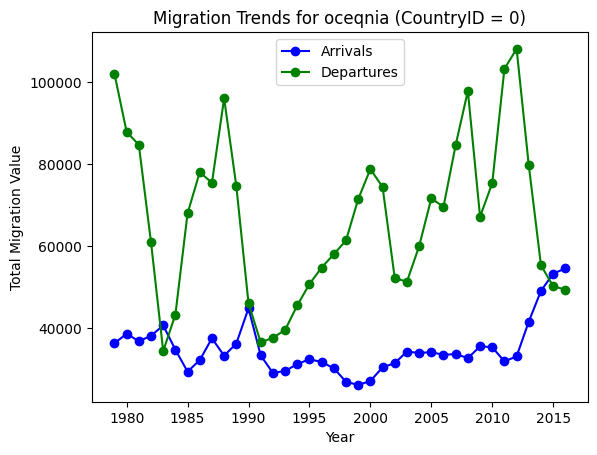

In [119]:
import matplotlib.pyplot as plt

country_0_data = data[data['CountryID'] == 0]

# Separate arrivals and departures
arrivals = country_0_data[country_0_data['Measure'] == 'Arrivals']
departures = country_0_data[country_0_data['Measure'] == 'Departures']

# Group by year for arrivals and departures
grouped_arrivals = arrivals.groupby(['Year']).aggregate({'Value': 'sum'})
grouped_departures = departures.groupby(['Year']).aggregate({'Value': 'sum'})

# Plotting
plt.plot(grouped_arrivals.index, grouped_arrivals['Value'], marker='o', label='Arrivals', color='blue')
plt.plot(grouped_departures.index, grouped_departures['Value'], marker='o', label='Departures', color='green')

plt.title('Migration Trends for oceqnia (CountryID = 0)')
plt.xlabel('Year')
plt.ylabel('Total Migration Value')
plt.legend()  # Display legend to show the color code for arrivals and departures
plt.show()
